In [1]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
import plotly.express as px

In [2]:
def dominate(a, b):
    sense = np.array([1, 1, 1, 1])
    if all((sense*a)>=(sense*b)) and any((sense*a)>(sense*b)):
        return 1
    else:
        return 0

In [3]:
colors = ['#33a02c','#6a3d9a','#ff7f00','#FFFF43','#b15928','#e31a1c','#1f78b4']

In [4]:
def all_metrics_parallel_coord(dataset, metric = 'accuracy',
                               acc_min = None, acc_max = None,
                               eo_min = None, eo_max = None,
                               pp_min=None, pp_max = None,
                               cv_min = None, cv_max = None):
    
    dominate_metr = np.array([any([dominate(other, row)
                                   for other in dataset.values])
                              for row in dataset.values])
    
    metrics = ['accuracy', 'equal_opportunity', 'p_percent', 'c_variation']
    
    met_aux = {"Modelo": [],
              "Acurácia": [],
              "Igualdade de Oportunidade": [],
              "P porcento": [],
              "Coeficiente de variação": [],
              'model_id': [],
              "metric_id": [],
              "metric": []}

    for m in range(len(metrics)):
        metric = metrics[m]
        
        met_aux["Modelo"].extend(['RegLogistica', 'EqualOp', 'ParDemo', 'Reweight', 'MinMax', 'ErroMO', 'ProbMO'])
        met_aux["Acurácia"].extend([dataset.loc[('LogReg',metric),metrics[0]],
                          dataset.loc[('RegEqual',metric),metrics[0]],
                          dataset.loc[('RegDemo',metric),metrics[0]],
                          dataset.loc[('RegRewe',metric),metrics[0]],
                          dataset.loc[('Minimax',metric),metrics[0]],
                          dataset.loc[('RegMoo',metric),metrics[0]],
                          dataset.loc[('RegEqMoo',metric),metrics[0]]])
        met_aux["Igualdade de Oportunidade"].extend([dataset.loc[('LogReg',metric),metrics[1]],
                          dataset.loc[('RegEqual',metric),metrics[1]],
                          dataset.loc[('RegDemo',metric),metrics[1]],
                          dataset.loc[('RegRewe',metric),metrics[1]],
                          dataset.loc[('Minimax',metric),metrics[1]],
                          dataset.loc[('RegMoo',metric),metrics[1]],
                          dataset.loc[('RegEqMoo',metric),metrics[1]]])
        met_aux["P porcento"].extend([dataset.loc[('LogReg',metric),metrics[2]],
                          dataset.loc[('RegEqual',metric),metrics[2]],
                          dataset.loc[('RegDemo',metric),metrics[2]],
                          dataset.loc[('RegRewe',metric),metrics[2]],
                          dataset.loc[('Minimax',metric),metrics[2]],
                          dataset.loc[('RegMoo',metric),metrics[2]],
                          dataset.loc[('RegEqMoo',metric),metrics[2]]])
        met_aux["Coeficiente de variação"].extend([dataset.loc[('LogReg',metric),metrics[3]],
                          dataset.loc[('RegEqual',metric),metrics[3]],
                          dataset.loc[('RegDemo',metric),metrics[3]],
                          dataset.loc[('RegRewe',metric),metrics[3]],
                          dataset.loc[('Minimax',metric),metrics[3]],
                          dataset.loc[('RegMoo',metric),metrics[3]],
                          dataset.loc[('RegEqMoo',metric),metrics[3]]])
        met_aux['model_id'].extend([0,1,2,3,4,5,6])
        met_aux['metric_id'].extend([m,m,m,m,m,m,m])
        met_aux['metric'].extend([metric,metric,metric,metric,metric,metric,metric])

    m_metrics = pd.DataFrame(data=met_aux, 
                                columns=['Modelo','Acurácia','Igualdade de Oportunidade','P porcento',
                                         'Coeficiente de variação','model_id', 'metric_id', 'metric'])
    
    acc_min = acc_min if acc_min is not None else m_metrics['Acurácia'].min()
    acc_max = acc_max if acc_max is not None else m_metrics['Acurácia'].max()
    eo_min = eo_min if eo_min is not None else m_metrics['Igualdade de Oportunidade'].min()
    eo_max = eo_max if eo_max is not None else m_metrics['Igualdade de Oportunidade'].max()
    pp_min = pp_min if pp_min is not None else m_metrics['P porcento'].min()
    pp_max = pp_max if pp_max is not None else m_metrics['P porcento'].max()
    cv_min = cv_min if cv_min is not None else m_metrics['Coeficiente de variação'].max()
    cv_max = cv_max if cv_max is not None else m_metrics['Coeficiente de variação'].min()

    fig = go.FigureWidget(data=
        go.Parcoords(
            line = dict(color = m_metrics['model_id'], 
                        colorscale = [(0.0, colors[0]),(0.14, colors[0]),
                            (0.14, colors[1]), (0.28, colors[1]),
                            (0.28, colors[2]),(0.42, colors[2]),
                            (0.42, colors[3]),(0.56, colors[3]),
                            (0.56, colors[4]),(0.7, colors[4]),
                            (0.7, colors[5]),(0.84, colors[5]),
                            (0.84, colors[6]),(1.0, colors[6])], 
                        showscale = True, cmin = 0, cmax = 6,
                       colorbar = {'tickvals': m_metrics['model_id'].tolist(),
                              'ticktext': m_metrics['Modelo'].tolist(),
                                  'title': 'Modelo'}),
            dimensions = list([
                dict(tickvals = [0,1,2,3],
                     ticktext = ['Acurácia','Iguald Oport','P porcento',
                                         'Coef de var'],
                     label = 'Métrica', values = m_metrics['metric_id']),
                #dict(tickvals = [0,1,2,3,4,5,6],
                #     ticktext = ['LogReg', 'RegEqual', 'RegDemo', 'RegRewe', 'Minimax','RegMoo', 'RegEqMoo'],
                #     label = 'Modelo', values = m_metrics['model_id']),
                
                dict(range = [eo_min, eo_max],
                    label = 'IO', values = m_metrics['Igualdade de Oportunidade']),
                dict(range = [pp_min, pp_max],
                    label = 'P%', values = m_metrics['P porcento']),
                dict(range = [cv_min, cv_max],
                    label = 'CV', values = m_metrics['Coeficiente de variação']),
                dict(range = [acc_min, acc_max],
                    label = 'Acc', values = m_metrics['Acurácia']),
            ])
        ), layout = dict(height=400, width=600)#title = "Resultado para cada modelo - German")
    )
    
    def selection_handler(trace, points, selector):
        print(points, selection)

    fig.data[0].on_selection(selection_handler)
    
    
    fig.update_layout(
        plot_bgcolor = 'white',
        paper_bgcolor = 'white'
    )

    return fig

In [30]:
german_result_metrics = pd.read_csv('Results/german_result_metrics.csv')
german_result_metrics = german_result_metrics.rename(columns={'Unnamed: 0':'method', 'Unnamed: 1':'metric'})
german_result_metrics = german_result_metrics.set_index(['method', 'metric'])

In [6]:
fig = all_metrics_parallel_coord(german_result_metrics)
fig

FigureWidget({
    'data': [{'dimensions': [{'label': 'Métrica',
                              'ticktext': [Ac…

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Optionally use different styles for the graph
# Gallery: http://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
# import matplotlib
# matplotlib.style.use('dark_background')  # interesting: 'bmh' / 'ggplot' / 'dark_background'


class Radar(object):
    def __init__(self, figure, title, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.9, 0.9]

        self.n = len(title)
        self.angles = np.arange(0, 360, 360.0/self.n)+45

        self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]

        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=title, fontsize=14)

        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid(False)
            ax.xaxis.set_visible(False)

        #print(labels)
            
        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.set_rgrids(range(1, 6), angle=angle, labels=label)
            ax.spines['polar'].set_visible(False)
            ax.set_ylim(0, 6)

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)

In [8]:
#colors = ['#9ecae1','#d4b9da','#fe9929','#fdd49e','#99d8c9','#238b45','#00441b']
methods = ['LogReg', 'RegRewe', 'RegDemo', 'RegEqual', 'Minimax', 'RegMoo', 'RegEqMoo']
metrics = ['accuracy', 'c_variation', 'equal_opportunity', 'p_percent']

In [9]:
colormap = dict(zip(methods, colors))
tickmap = dict(zip(metrics, ['--', '-.', ':', '-']))
metrmap = dict(zip([metric for metric in metrics], ['Acc', 'cVar', 'EqOp', 'p%']))
methmap = dict(zip(methods, ['RegLog', 'Rew', 'ParDem', 'EqOp', 'MinMax', 'MoErr', 'MoProb',]))

In [10]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

def build_radar(df_table, selection=None, steps=4, shift=1, include_legend=True, plot_name = 'aux.jpg'):
    df_table = df_table[metrics]
    
    normz = pd.DataFrame(index=['min', 'max'], columns=df_table.columns)
    for column in df_table:
        if column == 'c_variation':
            normz[column] = [df_table[column].max(), df_table[column].min()]
        else:
            normz[column] = [df_table[column].min(), df_table[column].max()]
            
    if selection is None:
        selection = pd.DataFrame(index=['min', 'max'])
        selection['accuracy'] = [0, 1]
        selection['c_variation'] = [0, 1]
        selection['equal_opportunity'] = [0, 1]
        selection['p_percent'] = [0, 1]
    
    selection = selection*steps + shift
    
    fig = plt.figure(figsize=(4, 4))

    tit = ['Acc', 'CV', 'IO', 'P%']

    lab = [ [normz[metric]['min'].round(2), '', '', '', normz[metric]['max'].round(2)]
           for metric in metrics
          ]

    radar = Radar(fig, tit, lab)
    for idx in df_table.index:
        line = steps*(df_table.loc[idx]-normz.loc['min'])/(normz.loc['max']-normz.loc['min'])+1
        selected =  all((line>=selection.loc['min'])&(line<=selection.loc['max']))
        alpha = 0.8 if selected else 0.05
        color = colormap[idx[0]]# if selected else 'white'
        radar.plot(line,  tickmap[idx[1]], lw=2, color=color, alpha=alpha)

    if include_legend:
        legend_elements = [Line2D([0], [0], color=colormap[meth], label=methmap[meth])
                          for meth in methods]

        legend_elements2 = [Line2D([0], [0], color='gray', linestyle=tickmap[metr], label=metrmap[metr])
                          for metr in metrics]

        leg2 = radar.ax.legend(handles=legend_elements, bbox_to_anchor=(0.95, 0.95), loc='upper left', title='Modelo')
        leg1 = radar.ax.legend(handles=legend_elements2, bbox_to_anchor=(0.95, 0.05), loc='lower left', title='Métrica otimizada')
        radar.ax.add_artist(leg2)
        
        fig.savefig(plot_name, bbox_extra_artists=(leg1,), bbox_inches='tight')
    else:
        fig.savefig(plot_name)

[[0.56, '', '', '', 0.61], [0.91, '', '', '', 0.49], [0.69, '', '', '', 1.0], [0.6, '', '', '', 1.0]]


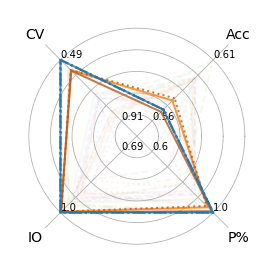

In [161]:
df_table = german_result_metrics

selection = pd.DataFrame(index=['min', 'max'])
selection['accuracy'] = [0.0, 1]
selection['c_variation'] = [0.0, 1]
selection['equal_opportunity'] = [0.97, 1]
selection['p_percent'] = [0.0, 1]

build_radar(df_table, selection, include_legend=False, plot_name = 'Plots/Radar_German_io.jpg')

In [33]:
lsac_result_metrics = pd.read_csv('Results/lsac_result_metrics.csv')
lsac_result_metrics = lsac_result_metrics.rename(columns={'Unnamed: 0':'method', 'Unnamed: 1':'metric'})
lsac_result_metrics = lsac_result_metrics.set_index(['method', 'metric'])

[[0.95, '', '', '', 0.95], [0.29, '', '', '', 0.28], [1.0, '', '', '', 1.0], [0.99, '', '', '', 1.0]]


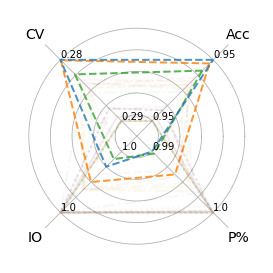

In [229]:
selection = pd.DataFrame(index=['min', 'max'])
selection['accuracy'] = [0.8, 1]
selection['c_variation'] = [0.0, 1]
selection['equal_opportunity'] = [0.0, 1]
selection['p_percent'] = [0.0, 1]

build_radar(lsac_result_metrics, selection, include_legend=False, plot_name = 'Plots/Radar_lsac_acc.jpg')

In [105]:
fig = all_metrics_parallel_coord(lsac_result_metrics)
fig

FigureWidget({
    'data': [{'dimensions': [{'label': 'Métrica',
                              'ticktext': [Ac…

In [36]:
adult_result_metrics = pd.read_csv('Results/adult_result_metrics.csv')
adult_result_metrics = adult_result_metrics.rename(columns={'Unnamed: 0':'method', 'Unnamed: 1':'metric'})
adult_result_metrics = adult_result_metrics.set_index(['method', 'metric'])

[[0.24, '', '', '', 0.83], [0.71, '', '', '', 0.34], [0.67, '', '', '', 1.0], [0.37, '', '', '', 1.0]]


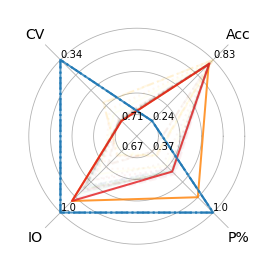

In [192]:
selection = pd.DataFrame(index=['min', 'max'])
selection['accuracy'] = [0.0, 1]
selection['c_variation'] = [0.0, 1]
selection['equal_opportunity'] = [0.0, 1]
selection['p_percent'] = [0.9, 1]

build_radar(adult_result_metrics, selection, include_legend=False, plot_name = 'Plots/Radar_Adult_io.jpg')

In [11]:
compas_result_metrics = pd.read_csv('Results/compas_result_metrics.csv')
compas_result_metrics = compas_result_metrics.rename(columns={'Unnamed: 0':'method', 'Unnamed: 1':'metric'})
compas_result_metrics = compas_result_metrics.set_index(['method', 'metric'])

[[0.45, '', '', '', 0.68], [1.16, '', '', '', 0.45], [0.51, '', '', '', 1.0], [0.38, '', '', '', 1.0]]


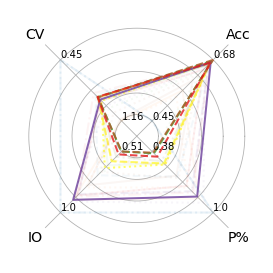

In [215]:
selection = pd.DataFrame(index=['min', 'max'])
selection['accuracy'] = [0.95, 1]
selection['c_variation'] = [0.0, 1]
selection['equal_opportunity'] = [0.0, 1]
selection['p_percent'] = [0.0, 1]

build_radar(compas_result_metrics, selection, include_legend=False, plot_name = 'Plots/Radar_compas_acc.jpg')

In [42]:
compas_result_metrics

accuracy  equal_opportunity  p_percent  \
method   metric                                                      
LogReg   accuracy           0.673198           0.508891   0.399287   
         equal_opportunity  0.634656           0.681669   0.379781   
         p_percent          0.659271           0.618494   0.498609   
         c_variation        0.661700           0.551186   0.479693   
RegEqual accuracy           0.666721           0.587236   0.500678   
         equal_opportunity  0.666073           0.642491   0.512849   
         p_percent          0.662672           0.631884   0.510632   
         c_variation        0.662834           0.590013   0.515513   
RegDemo  accuracy           0.662348           0.581769   0.508358   
         equal_opportunity  0.538947           0.797233   0.747107   
         p_percent          0.561619           0.896979   0.857120   
         c_variation        0.663158           0.588448   0.513173   
RegRewe  accuracy           0.660405           0.850525   0.783931   
         equal_opportunity  0.646154           0.912500   0.900662   
         p_percent          0.668178           0.897535   0.837628   
         c_variation        0.657490           0.855488   0.784433   
Minimax  accuracy           0.677571           0.508466   0.391982   
         equal_opportunity  0.621862           0.672558   0.650867   
         p_percent          0.599838           0.780353   0.626705   
         c_variation        0.663158           0.550193   0.477212   
RegMoo   accuracy           0.667530           0.532030   0.432551   
         equal_opportunity  0.640000           0.862456   0.729166   
         p_percent          0.640000           0.862456   0.729166   
         c_variation        0.660729           0.871766   0.796540   
RegEqMoo accuracy           0.662348           0.700212   0.634492   
         equal_opportunity  0.446964           1.000000   1.000000   
         p_percent          0.446964           1.000000   1.000000   
         c_variation        0.446964           1.000000   1.000000   

                            c_variation  
method   metric                          
LogReg   accuracy              0.884019  
         equal_opportunity     1.011140  
         p_percent             0.925268  
         c_variation           0.879794  
RegEqual accuracy              0.887741  
         equal_opportunity     0.925438  
         p_percent             0.917987  
         c_variation           0.877232  
RegDemo  accuracy              0.882415  
         equal_opportunity     1.158188  
         p_percent             1.154595  
         c_variation           0.877535  
RegRewe  accuracy              0.898120  
         equal_opportunity     0.981965  
         p_percent             0.912238  
         c_variation           0.893903  
Minimax  accuracy              0.886887  
         equal_opportunity     1.063769  
         p_percent             1.141635  
         c_variation           0.879954  
RegMoo   accuracy              0.880765  
         equal_opportunity     0.923511  
         p_percent             0.923511  
         c_variation           0.836559  
RegEqMoo accuracy              0.858423  
         equal_opportunity     0.452737  
         p_percent             0.452737  
         c_variation           0.452737

----------------

## Grid Radar

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Optionally use different styles for the graph
# Gallery: http://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
# import matplotlib
# matplotlib.style.use('dark_background')  # interesting: 'bmh' / 'ggplot' / 'dark_background'


class Radar(object):
    def __init__(self, figure, title, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.9, 0.9]

        self.n = len(title)
        self.angles = np.arange(0, 360, 360.0/self.n)+45

        self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]

        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=title, fontsize=14)

        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid(False)
            ax.xaxis.set_visible(False)

        #print(labels)
            
        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.set_rgrids(range(1, 6), angle=angle, labels=label)
            ax.spines['polar'].set_visible(False)
            ax.set_ylim(0, 6)

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)

In [37]:
def build_grid_radar(df_table, selection=None, steps=4, shift=1, include_legend=True, plot_name = 'aux.jpg'):
    df_table = df_table[metrics]
    
    normz = pd.DataFrame(index=['min', 'max'], columns=df_table.columns)
    for column in df_table:
        if column == 'c_variation':
            normz[column] = [df_table[column].max(), df_table[column].min()]
        else:
            normz[column] = [df_table[column].min(), df_table[column].max()]
            
    if selection is None:
        selection = pd.DataFrame(index=['min', 'max'])
        selection['accuracy'] = [0, 1]
        selection['c_variation'] = [0, 1]
        selection['equal_opportunity'] = [0, 1]
        selection['p_percent'] = [0, 1]
    
    selection = selection*steps + shift
    
    fig = plt.figure(figsize=(4, 4))
    
    met = ['Acc', 'CV', 'IO', 'P']

    tit = ['', '', '', '']

    lab = [ ['', '', '','', '']
           for metric in metrics
          ]

    radar = Radar(fig, tit, lab)
    
    i = 0
    for idx in df_table.index:
        line = steps*(df_table.loc[idx]-normz.loc['min'])/(normz.loc['max']-normz.loc['min'])+1
        #selected =  all((line>=selection.loc['min'])&(line<=selection.loc['max']))
        #alpha = 0.8 if selected else 0.05
        #color = colormap[idx[0]]# if selected else 'white'
        radar.plot(line, lw=2)
        fig.savefig('Plots/Grid_Radar_adult_'+str(idx[0])+met[i%4]+'.jpg')
        fig = plt.figure(figsize=(4, 4))
        radar = Radar(fig, tit, lab)
        i += 1

    if include_legend:
        legend_elements = [Line2D([0], [0], color=colormap[meth], label=methmap[meth])
                          for meth in methods]

        legend_elements2 = [Line2D([0], [0], color='gray', linestyle=tickmap[metr], label=metrmap[metr])
                          for metr in metrics]

        leg2 = radar.ax.legend(handles=legend_elements, bbox_to_anchor=(0.95, 0.95), loc='upper left', title='Modelo')
        leg1 = radar.ax.legend(handles=legend_elements2, bbox_to_anchor=(0.95, 0.05), loc='lower left', title='Métrica otimizada')
        radar.ax.add_artist(leg2)
        
        fig.savefig(plot_name, bbox_extra_artists=(leg1,), bbox_inches='tight')
    else:
        fig.savefig(plot_name)

/root/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/root/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/root/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this w

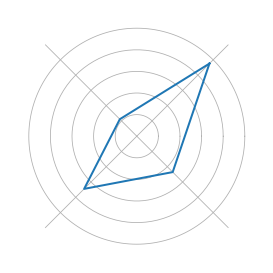

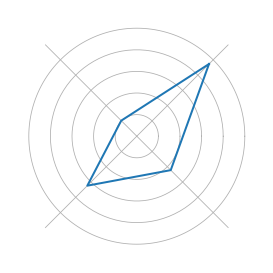

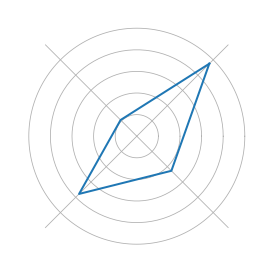

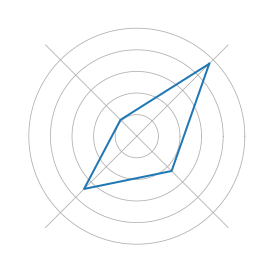

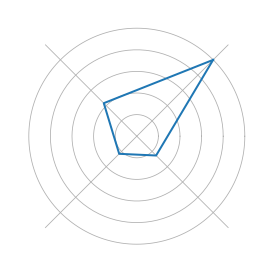

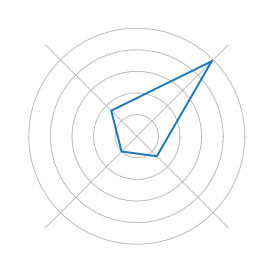

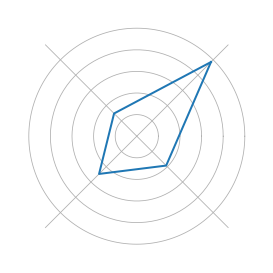

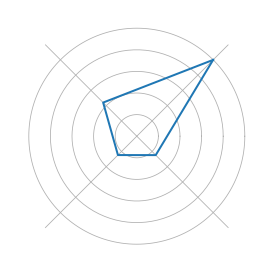

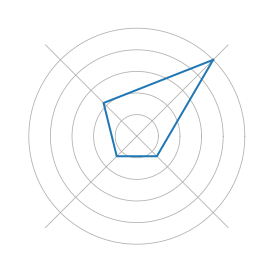

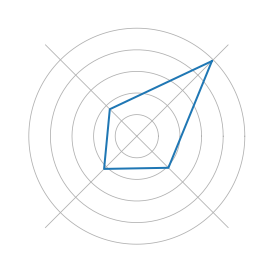

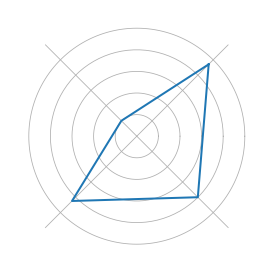

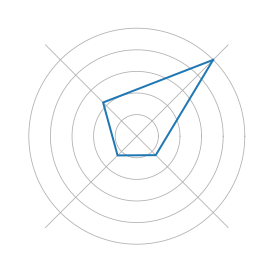

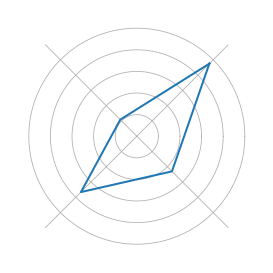

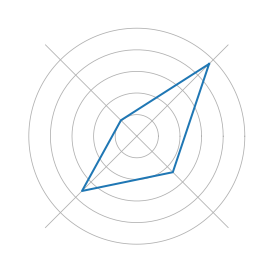

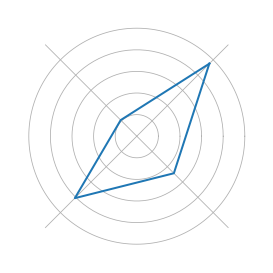

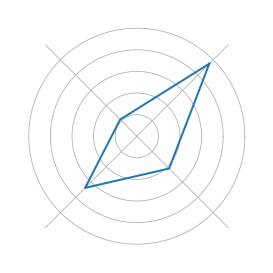

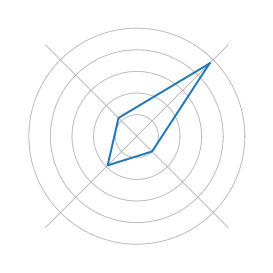

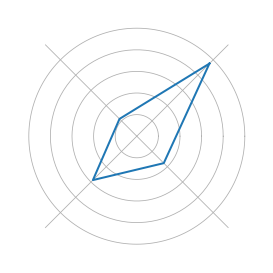

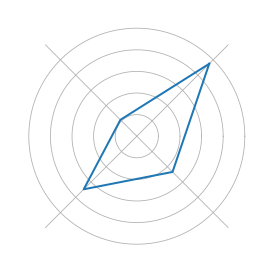

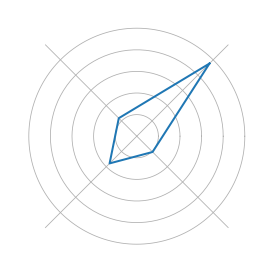

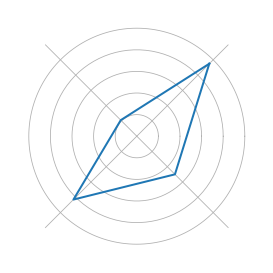

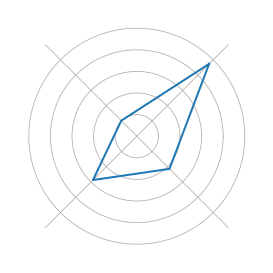

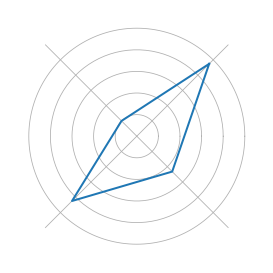

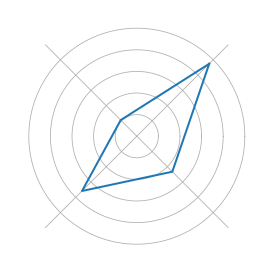

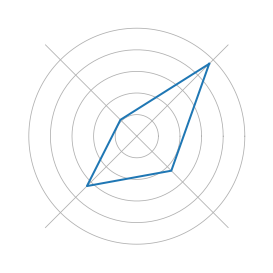

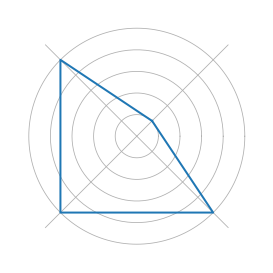

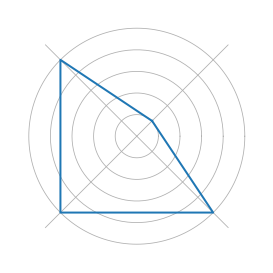

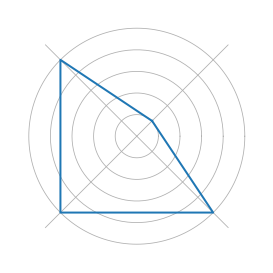

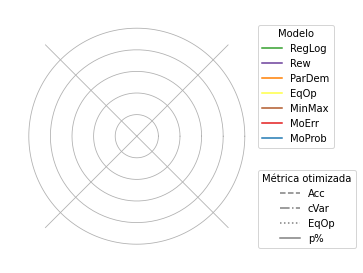

In [38]:
build_grid_radar(adult_result_metrics)